In [1]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt
import tensorflow as tf  # Importing the TensorFlow Library
from tensorflow import keras  # Import Keras from TensorFlow
from tensorflow.keras import Sequential 
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import regularizers
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
from tensorflow.keras.datasets.cifar10 import load_data 
(x_train, y_train), (x_test, y_test) = load_data()

In [3]:
print(f"Total number of training dataset: {len(x_train)}")
print(f"Shape of Training images: {x_train.shape}")
print(f"Total number of test dataset: {len(x_test)}")
print(f"Shape of Testing images: {x_test.shape}")

unique_elements, counts_elements = np.unique(y_train, return_counts=True)

print(f"Number of classes: {len(unique_elements)}")
print("\n")

print(f'''Number of train samples by class: 
Class Labels: {unique_elements}
Number of Samples: {counts_elements}''')
print("\n")

unique_elements, counts_elements = np.unique(y_test, return_counts=True)

print(f'''Number of test samples by class: 
Class Labels: {unique_elements}
Number of Samples: {counts_elements}''')
print("\n")

Total number of training dataset: 50000
Shape of Training images: (50000, 32, 32, 3)
Total number of test dataset: 10000
Shape of Testing images: (10000, 32, 32, 3)
Number of classes: 10


Number of train samples by class: 
Class Labels: [0 1 2 3 4 5 6 7 8 9]
Number of Samples: [5000 5000 5000 5000 5000 5000 5000 5000 5000 5000]


Number of test samples by class: 
Class Labels: [0 1 2 3 4 5 6 7 8 9]
Number of Samples: [1000 1000 1000 1000 1000 1000 1000 1000 1000 1000]




In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

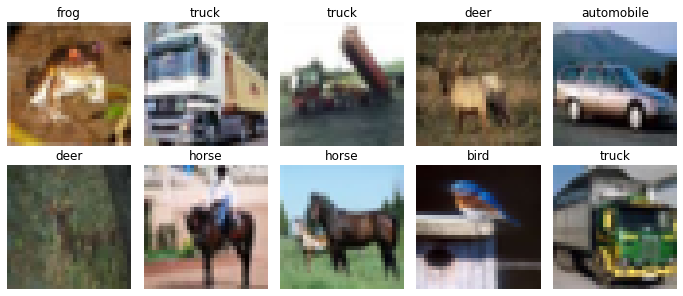

In [5]:
num_rows, num_cols = 2, 5
f, ax = plt.subplots(num_rows, num_cols, figsize=(12,5),
                     gridspec_kw={'wspace':0.10, 'hspace':0.10}, 
                     squeeze=True)
for r in range(num_rows):
    for c in range(num_cols):
        image_index = r * 10 + c
        ax[r,c].axis("off")
        ax[r,c].imshow(x_train[image_index], cmap='gray')
        ax[r,c].set_title(class_names[y_train[image_index][0]])
plt.show()
plt.close()

In [6]:
#Normalizing the pixel values
x_train = x_train / 255.0
x_test= x_test / 255.0

In [7]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [8]:
height = x_train.shape[1]
width = x_train.shape[2]
channel = x_train.shape[3]
def create_model():
    model = Sequential()
    model.add(Conv2D(32, (3,3), activation="relu", padding="same", input_shape=(height, width, channel)))
    model.add(BatchNormalization())
    
    model.add(Conv2D(32, (3,3), activation="relu", padding="same"))
    #model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.2))
    
    model.add(Conv2D(64, (3,3), activation="relu", padding="same"))
    #model.add(BatchNormalization())
    
    model.add(Conv2D(64, (3,3), activation="relu", padding="same"))
    #model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(tf.keras.layers.Flatten())
    
    model.add(Dense(512, activation="relu"))
    model.add(BatchNormalization())
    model.add(Dropout(0.1))
    
    model.add(Dense(10, activation="softmax"))
    
    model.compile(optimizer='adam',
              loss=categorical_crossentropy,
              metrics=['accuracy'])
    
    return model

In [9]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        3

In [10]:
EPOCHS = 20

es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, 
                                               restore_best_weights=True,
                                               verbose=1)
history = model.fit(x_train, y_train,
          batch_size=32,
          epochs=50,
          verbose=1,
          validation_data=(x_test, y_test), 
          callbacks=[es_callback])

Epoch 1/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3011 - accuracy: 0.5426 - val_loss: 1.5889 - val_accuracy: 0.4929
Epoch 2/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9177 - accuracy: 0.6795 - val_loss: 0.8558 - val_accuracy: 0.7095
Epoch 3/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7893 - accuracy: 0.7238 - val_loss: 0.8215 - val_accuracy: 0.7166
Epoch 4/50
1563/1563 [==============================] - 9s 5ms/step - loss: 0.7163 - accuracy: 0.7487 - val_loss: 0.6969 - val_accuracy: 0.7560
Epoch 5/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6464 - accuracy: 0.7749 - val_loss: 0.7411 - val_accuracy: 0.7371
Epoch 6/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5865 - accuracy: 0.7934 - val_loss: 0.6653 - val_accuracy: 0.7756
Epoch 7/50
1563/1563 [==============================] - 9s 5ms/step - loss: 0.5430 - accuracy: 0.8106 - val_loss: 0.6897 - val_accuracy:

In [11]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.5925986170768738
Test accuracy: 0.8011999726295471


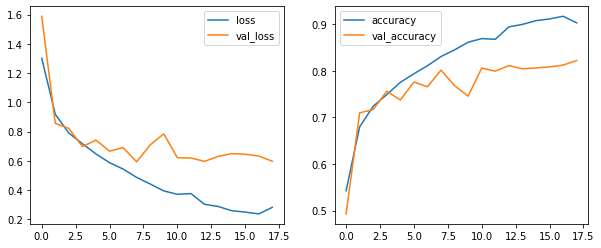

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

history_df = pd.DataFrame(history.history)
history_df[['loss', 'val_loss']].plot(kind='line', ax=ax[0])
history_df[['accuracy', 'val_accuracy']].plot(kind='line', ax=ax[1]);

In [13]:
predictions =np.round(model.predict(x_test))
  

In [14]:
predictions



array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [15]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [16]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

           0       0.79      0.87      0.83      1000
           1       0.87      0.93      0.90      1000
           2       0.79      0.67      0.72      1000
           3       0.69      0.63      0.66      1000
           4       0.87      0.64      0.74      1000
           5       0.83      0.62      0.71      1000
           6       0.88      0.81      0.85      1000
           7       0.87      0.84      0.86      1000
           8       0.94      0.84      0.89      1000
           9       0.96      0.75      0.84      1000

   micro avg       0.85      0.76      0.80     10000
   macro avg       0.85      0.76      0.80     10000
weighted avg       0.85      0.76      0.80     10000
 samples avg       0.76      0.76      0.76     10000



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
